In [3]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal, fftpack

In [15]:
Fs = 1.28125e9
N_samples = 131072;
fundamental_freq = Fs/(N_samples-1)
freq_desired = np.linspace(-300e6,300e6,61)
freq_realistic = np.floor(freq_desired / fundamental_freq) * fundamental_freq
t = np.arange(N_samples)

In [14]:
freq_realistic

array([-3.00002003e+08, -2.90001936e+08, -2.80001869e+08, -2.70001802e+08,
       -2.60001736e+08, -2.50001669e+08, -2.40001602e+08, -2.30001535e+08,
       -2.20001469e+08, -2.10001402e+08, -2.00001335e+08, -1.90001268e+08,
       -1.80001202e+08, -1.70001135e+08, -1.60001068e+08, -1.50001001e+08,
       -1.40000935e+08, -1.30000868e+08, -1.20000801e+08, -1.10000734e+08,
       -1.00000668e+08, -9.00006008e+07, -8.00005341e+07, -7.00004673e+07,
       -6.00004005e+07, -5.00003338e+07, -4.00002670e+07, -3.00002003e+07,
       -2.00001335e+07, -1.00000668e+07,  0.00000000e+00,  9.99029152e+06,
        1.99903583e+07,  2.99904250e+07,  3.99904918e+07,  4.99905586e+07,
        5.99906253e+07,  6.99906921e+07,  7.99907588e+07,  8.99908256e+07,
        9.99908923e+07,  1.09990959e+08,  1.19991026e+08,  1.29991093e+08,
        1.39991159e+08,  1.49991226e+08,  1.59991293e+08,  1.69991360e+08,
        1.79991426e+08,  1.89991493e+08,  1.99991560e+08,  2.09991627e+08,
        2.19991693e+08,  

In [24]:
sig_out = np.zeros(N_samples)
for x, freq in enumerate(freq_realistic):
    sig_out = sig_out + np.cos(2*np.pi*freq/Fs*t) + 1j*np.sin(2*np.pi*freq/Fs*t)

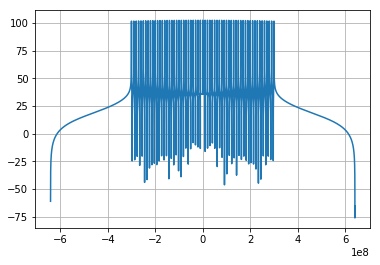

In [27]:
freq_axis = np.linspace(-Fs/2, Fs/2, N_samples)
plt.plot(freq_axis, 20*np.log10(np.abs(fftpack.fftshift(fftpack.fft(sig_out)))))
plt.grid(True)


In [29]:
np.max(10000/61*sig_out)

(10000+2.910550095701861e-08j)

In [33]:
#converting to fixed point
sig_out = 10000/61*sig_out

In [35]:
sig_out = np.floor(np.real(sig_out)) + 1j*np.floor(np.imag(sig_out))

In [36]:
sig_out

array([10000.+0.j,  6667.-1.j,   500.-1.j, ...,   500.+0.j,  6667.+0.j,
       10000.+0.j])

In [1]:
# let's repeat this experiment  but without inverting the phase

In [4]:
Fs = 1.28125e9
N_samples = 131072;
fundamental_freq = Fs/(N_samples-1)
freq_desired = np.linspace(0,300e6,31)
freq_realistic = np.floor(freq_desired / fundamental_freq) * fundamental_freq
t = np.arange(N_samples)
freq_realistic

array([0.00000000e+00, 9.99029152e+06, 1.99903583e+07, 2.99904250e+07,
       3.99904918e+07, 4.99905586e+07, 5.99906253e+07, 6.99906921e+07,
       7.99907588e+07, 8.99908256e+07, 9.99908923e+07, 1.09990959e+08,
       1.19991026e+08, 1.29991093e+08, 1.39991159e+08, 1.49991226e+08,
       1.59991293e+08, 1.69991360e+08, 1.79991426e+08, 1.89991493e+08,
       1.99991560e+08, 2.09991627e+08, 2.19991693e+08, 2.29991760e+08,
       2.39991827e+08, 2.49991894e+08, 2.59991960e+08, 2.69992027e+08,
       2.79992094e+08, 2.89992161e+08, 2.99992227e+08])

In [6]:
# now generate the negative side
freq_desired = np.linspace(-300e6+1.28125e9,1.28125e9,31)
freq_realistic2 = np.floor(freq_desired / fundamental_freq) * fundamental_freq
freq_realistic2

array([9.81247997e+08, 9.91248064e+08, 1.00124813e+09, 1.01124820e+09,
       1.02124826e+09, 1.03124833e+09, 1.04124840e+09, 1.05124846e+09,
       1.06124853e+09, 1.07124860e+09, 1.08124866e+09, 1.09124873e+09,
       1.10124880e+09, 1.11124887e+09, 1.12124893e+09, 1.13124900e+09,
       1.14124907e+09, 1.15124913e+09, 1.16124920e+09, 1.17124927e+09,
       1.18124933e+09, 1.19124940e+09, 1.20124947e+09, 1.21124953e+09,
       1.22124960e+09, 1.23124967e+09, 1.24124973e+09, 1.25124980e+09,
       1.26124987e+09, 1.27124993e+09, 1.28124022e+09])

In [7]:
freq_realistic2.size

31

In [10]:
# we want to drop the last one and create a total vector
freq_realistic_total = [freq_realistic, freq_realistic2]

In [16]:
freq_realistic_total = np.append(freq_realistic, freq_realistic2)

In [20]:
freq_realistic_total[0:61].size

61

In [40]:
# better idea, create a -10MHz tone
sig_tone = np.cos(2*np.pi*1/Fs*t) + 1j*np.sin(2*np.pi*1/Fs*t)
sig_tone2 = np.cos(2*np.pi*(Fs+1)/Fs*t) + np.sin(2*np.pi*(Fs+1)/Fs*t)

C:\Users\zstechly\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\zstechly\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  
C:\Users\zstechly\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\__init__.py:911: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
C:\Users\zstechly\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\rcsetup.py:156: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


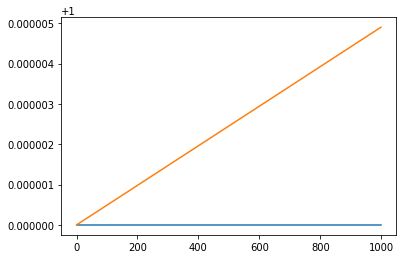

In [41]:
plt.plot(sig_tone[0:1000])
plt.hold(True)
plt.plot(sig_tone2[0:1000])